# Modul 3 Sains Data

Kembali ke [Sains Data](./saindat2024genap.qmd)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Install `scikit-learn` dengan:

`!pip install scikit-learn`

Lalu import `sklearn`:

In [81]:
import sklearn

## Import Dataset

Untuk praktikum kali ini, kita akan menggunakan dataset "California Housing Prices" (housing.csv) yang bisa didownload dari salah satu sumber berikut:

* [Direct link (langsung dari GitHub Pages ini)](./housing.csv)

* Kaggle: <https://www.kaggle.com/datasets/camnugent/california-housing-prices>

Kemudian, baca sebagai dataframe:

In [82]:
df = pd.read_csv("./housing.csv")

Mari kita lihat isinya:

In [83]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Ada satu data kategorik, yaitu `ocean_proximity`. Mari kita liat jenis-jenisnya (kategorinya):

In [84]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Apakah ada *missing value*?

In [85]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [86]:
df[df["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Perhatikan bahwa tipe datanya adalah `int64` atau bilangan bulat.

Dari 20640 baris, ada satu kolom/fitur (`total_bedrooms`) dengan 207 missing value.

Secara umum, ada dua cara untuk menangani *missing value*:

1. Menghapus baris-baris yang memiliki *missing value*, dengan `df.dropna()`

2. Melakukan metode imputasi

Karena banyaknya *missing value* relatif sedikit, sebenarnya tidak masalah apabila baris-baris tersebut cukup dihapus saja. Namun, kita akan mempelajari metode imputasi.

## Encoding Data Kategorik

Sebelum kita membahas metode imputasi, kita akan membahas tentang melakukan "encoding" untuk data kategorik.

Banyak metode sains data / *machine learning* yang hanya bisa digunakan dengan data numerik. Oleh karena itu, data kategorik perlu diubah terlebih dahulu menjadi data numerik, melakukan yang namanya *categorical data encoding*

Metode yang sering digunakan adalah *one hot encoding*. Misalnya ada satu fitur kategorik dengan $n$ kemungkinan data, bernama $D_i$ untuk $i = 1, 2, \dots, n$. Maka fitur tersebut diganti dengan $n$ kolom baru, misal bernama $K_i$ untuk $i = 1, 2, \dots, n$, di mana pada kolom ke-i, isinya adalah

* $1$, apabila data aslinya pada baris tersebut adalah $D_i$
* $0$ apabila bukan $D_i$

In [87]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
encoder = OneHotEncoder()

In [89]:
hasil_onehot = encoder.fit_transform(df[["ocean_proximity"]])

In [90]:
print(encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [91]:
print(encoder.categories_[0])

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [92]:
kolom_encoding = list(encoder.categories_[0])

In [93]:
print(kolom_encoding)

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


In [94]:
onehot_array = hasil_onehot.toarray()

In [95]:
print(onehot_array)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [96]:
onehot_df = pd.DataFrame(onehot_array, columns=kolom_encoding)

In [97]:
onehot_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [98]:
df = pd.concat([df, onehot_df], axis=1)

In [99]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.0,1.0,0.0,0.0,0.0


In [100]:
df = df.drop(["ocean_proximity"], axis=1)

In [101]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


## Metode Imputasi

### Median

In [102]:
df_fill_median = df.copy()

In [103]:
df["total_bedrooms"].median()

435.0

In [104]:
bedrooms_median = df["total_bedrooms"].median()
print(bedrooms_median)

435.0


In [105]:
df_fill_median["total_bedrooms"] = df_fill_median["total_bedrooms"].fillna(bedrooms_median)

In [106]:
df_fill_median.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Cara lain, menggunakan scikit-learn:

In [107]:
df_fill_median2 = df.copy()

In [108]:
from sklearn.impute import SimpleImputer

In [109]:
median_imputer = SimpleImputer(
    missing_values=np.nan, strategy='median'
)

In [110]:
df_fill_median2[["total_bedrooms"]] = median_imputer.fit_transform(
    df_fill_median2[["total_bedrooms"]]
)

In [111]:
df_fill_median2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

### Modus

In [112]:
df_fill_mode = df.copy()

In [113]:
df["total_bedrooms"].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [114]:
df["total_bedrooms"].mode()[0]

280.0

In [115]:
bedrooms_mode = df["total_bedrooms"].mode()[0]
print(bedrooms_mode)

280.0


In [116]:
df_fill_mode["total_bedrooms"] = df_fill_mode["total_bedrooms"].fillna(bedrooms_mode)

In [117]:
df_fill_mode.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Cara lain, menggunakan scikit-learn:

In [118]:
df_fill_mode2 = df.copy()

In [119]:
mode_imputer = SimpleImputer(
    missing_values=np.nan, strategy='most_frequent'
)

In [120]:
df_fill_mode2[["total_bedrooms"]] = mode_imputer.fit_transform(
    df_fill_mode2[["total_bedrooms"]]
)

In [121]:
df_fill_mode2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

### Mean (rata-rata)

In [122]:
df_fill_mean = df.copy()

In [123]:
df_fill_mean["total_bedrooms"].mean()

537.8705525375618

In [124]:
np.round(df_fill_mean["total_bedrooms"].mean())

538.0

In [125]:
bedrooms_mean = np.round(df_fill_mean["total_bedrooms"].mean())
print(bedrooms_mean)

538.0


In [126]:
df_fill_mean["total_bedrooms"] = df_fill_mean["total_bedrooms"].fillna(bedrooms_mean)

In [127]:
df_fill_mean.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Cara lain, menggunakan scikit-learn:

In [128]:
df_fill_mean2 = df.copy()

In [129]:
mean_imputer = SimpleImputer(
    missing_values=np.nan, strategy='mean'
)

In [130]:
df_fill_mean2[["total_bedrooms"]] = mean_imputer.fit_transform(
    df_fill_mean2[["total_bedrooms"]]
)

In [131]:
df_fill_mean2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

### KNNImputer

In [132]:
from sklearn.impute import KNNImputer

In [133]:
knn_imputer = KNNImputer(n_neighbors=3)

In [134]:
df_fill_knn = df.copy()

KNN Imputer memerlukan kolom-kolom lainnya sebagai acuan, dan hanya bisa bekerja dengan data numerik. Sehingga, kita perlu mem-filter terlebih dahulu kolom-kolom numerik dari dataset kita.

In [135]:
df_fill_knn.select_dtypes(include='number')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [136]:
df_fill_knn.select_dtypes(include='number').columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [137]:
num_col = df_fill_knn.select_dtypes(include='number').columns

In [138]:
df_fill_knn[num_col] = knn_imputer.fit_transform(df_fill_knn[num_col])

In [139]:
df_fill_knn.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

## Perbandingan Metode Imputasi

Kita bisa membandingkan beberapa metode imputasi (dan memilih yang mana yang terbaik) dengan langkah-langkah berikut.

1. Use a sample of your own dataset that does not contain any missing data (will serve as ground truth).
2. Introduce increasing proportions of missing data at random (e.g. 5–50 % in 5 % increments).
3. Reconstruct the missing data using the various methods.
4. Compute the sum of squared errors between the reconstructed and the original data, for each method and each proportion of missing data.

Langkah pertama, kita perlu memperoleh sample dari dataset kita yang tidak mengandung *missing value*, yang bisa disebut *ground truth*. Cara termudah adalah dengan menghapus baris-baris yang memiliki *missing value* (biasanya dipilih lagi sample hanya sebagian baris, tapi di sini tidak kita lakukan):

In [140]:
df_ground_truth = df.dropna()

In [141]:
df_ground_truth

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


Selanjutnya, kita perlu membolong-bolongi dataset ini, agar sekian persen diisi *missing value*.

In [142]:
import random

In [143]:
def missing_value_generator(df_original, percentage):
    df_miss = df_original.copy()
    baris, kolom = df_miss.shape
    n_total = baris*kolom

    permutasi = list(range(n_total))
    random.shuffle(permutasi)

    n_pilih = int(percentage * n_total)
    pilihan = permutasi[0 : n_pilih]

    for p in pilihan:
        df_miss.iloc[ int(p/kolom), p%kolom ] = np.nan
    
    return df_miss

In [144]:
df_miss_5 = missing_value_generator(df, 0.05)

In [145]:
df_miss_5.isna().sum()

longitude             1021
latitude              1015
housing_median_age    1064
total_rooms           1004
total_bedrooms        1205
population            1087
households            1032
median_income         1004
median_house_value    1018
<1H OCEAN             1050
INLAND                1023
ISLAND                1085
NEAR BAY              1051
NEAR OCEAN             981
dtype: int64

In [146]:
def compare_imputation(df_ground_truth, methods, percentages):
    list_missing_df = []
    for percent in percentages:
        df_miss = missing_value_generator(df_ground_truth, percent)
        list_missing_df.append(df_miss)

    all_results = []
    for method in methods:
        method_results = []
        for df_miss in list_missing_df:
            df_imputed = method.fit_transform(df_miss)
            SSE = ((df_ground_truth - df_imputed)**2).sum().sum()
            method_results.append(SSE)
        all_results.append(method_results)

    return all_results

In [147]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [148]:
list_persen = [0.05, 0.10, 0.15, 0.20, 0.25]

In [149]:
all_results = compare_imputation(
    df_ground_truth,
    [median_imputer, mean_imputer, mode_imputer],
    list_persen
)

In [150]:
all_results

[[16106399718053.193,
  27686624654974.12,
  42067852690522.375,
  57674869517426.2,
  71398507402041.0],
 [15149962314993.664,
  26691038947100.4,
  39993567341678.87,
  54874386927172.04,
  67502299532092.21],
 [104263768244576.97,
  200631901715894.3,
  302872434183477.3,
  413821496079702.0,
  502638602704461.3]]

In [151]:
print("Median:", all_results[0])
print("Mean:", all_results[1])
print("Mode:", all_results[2])

Median: [16106399718053.193, 27686624654974.12, 42067852690522.375, 57674869517426.2, 71398507402041.0]
Mean: [15149962314993.664, 26691038947100.4, 39993567341678.87, 54874386927172.04, 67502299532092.21]
Mode: [104263768244576.97, 200631901715894.3, 302872434183477.3, 413821496079702.0, 502638602704461.3]


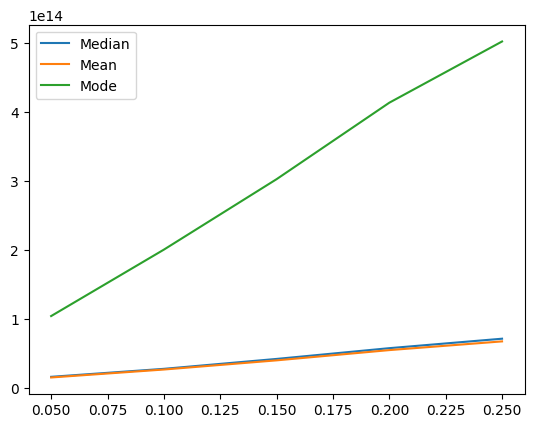

In [152]:
plt.plot(list_persen, all_results[0])
plt.plot(list_persen, all_results[1])
plt.plot(list_persen, all_results[2])
plt.legend(["Median", "Mean", "Mode"])
plt.show()

Dari hasil tersebut, didapat bahwa secara keseluruhan, untuk setiap persentase missing values, metode imputasi dengan menggunakan mean menghasilkan SSE yang terkecil dibandingkan imputasi dengan median dan modus. Oleh karena itu, kita akan menggunakan metode imputasi menggunakan mean untuk mengisi missing value pada kolom "total_bedrooms" dari df asli.

In [153]:
# melihat kembali df awal
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [154]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [155]:
# lakukan imputasi dengan metode terbaik yg telah didapat, yaitu dengan mean

df[['total_bedrooms']] = mean_imputer.fit_transform(df[['total_bedrooms']] )

In [156]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [157]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

### Export Dataframe yang telah diimputasi ke CSV

In [158]:
df.to_csv("housing_modified.csv")

## Regresi Linier